# PET simulation analysis

Analysis after the simulation :
- in folder: pet/
- macro: main.mac


In [2]:
# The following notebook is what my Pet Root looks like with my geometry 
# what the output should be.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot

In [3]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('/Users/cmwever73/Desktop/nbdata')
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'myPetOutput2Gam500k.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /Users/cmwever73/Desktop/nbdata


In [4]:
print("List of keys: \n", f.keys())

List of keys: 
 [b'Hits;565', b'Hits;564', b'Singles;511', b'Singles;510', b'latest_event_ID;1', b'total_nb_primaries;1', b'OpticalData;1', b'Coincidences;1', b'delay;1']


In [5]:
hits = f[b'Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

Number of hits: 564684
Hits: 
b'PDGEncoding'  b'trackID'  b'parentID'  b'trackLocalTime'  b'time'  b'edep'  b'stepLength'  b'trackLength'  b'posX'  b'posY'  b'posZ'  b'localPosX'  b'localPosY'  b'localPosZ'  b'momDirX'  b'momDirY'  b'momDirZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'photonID'  b'nPhantomCompton'  b'nCrystalCompton'  b'nPhantomRayleigh'  b'nCrystalRayleigh'  b'primaryID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'sourceID'  b'eventID'  b'runID'  b'axialPos'  b'rotationAngle'  b'volumeID'  b'processName'  b'comptVolName'  b'RayleighVolName'  

# Plot 1: position of hits, hits times (global & local)

In [6]:
import numpy as np
hits_localx = hits.arrays()[b'localPosX']
hits_localy = hits.arrays()[b'localPosY']
hits_localz = hits.arrays()[b'localPosZ']
edep = hits.arrays()[b'edep']

xyze = np.column_stack((hits_localx,hits_localy,hits_localz,edep))

yzeDetectorA = xyze[np.where((xyze[:, 0] < 0.000))[0]]
#print (yzeDetectorA)
np.savetxt('DecA.txt', yzeDetectorA)
yzeDetectorB = xyze[np.where((xyze[:, 0] > 0.000))[0]]
np.savetxt('DecB.txt', yzeDetectorB)
#print (yzeDetectorB)

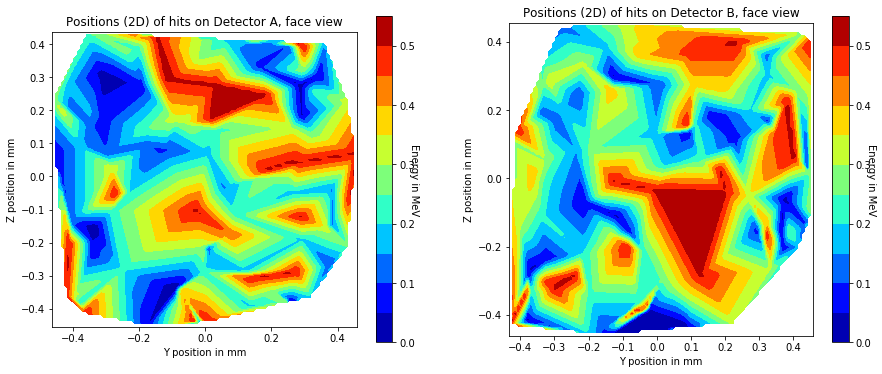

In [7]:
leng = 100
fig, ax = plt.subplots(1,2, figsize=(15, 6))

yzeDetectorA = np.loadtxt(fname = "DecA.txt", dtype = 'float')

yA = yzeDetectorA[:leng, 1]
zA = yzeDetectorA[:leng, 2]
dA = yzeDetectorA[:leng, 3]

yminA = min(yzeDetectorA[:leng, 1])
ymaxA = max(yzeDetectorA[:leng, 1])
zminA = min(yzeDetectorA[:leng, 2])
zmaxA = max(yzeDetectorA[:leng, 2])


yzeDetectorB = np.loadtxt(fname = "DecB.txt", dtype = 'float')

yB = yzeDetectorB[:leng, 1]
zB = yzeDetectorB[:leng, 2]
dB = yzeDetectorB[:leng, 3]

yminB = min(yzeDetectorB[:leng, 1])
ymaxB = max(yzeDetectorB[:leng, 1])
zminB = min(yzeDetectorB[:leng, 2])
zmaxB = max(yzeDetectorB[:leng, 2])


yiA = np.linspace(yminA, ymaxA, leng)
ziA = np.linspace(zminA, zmaxA, leng)

yiB = np.linspace(yminB, ymaxB, leng)
ziB = np.linspace(zminB, zmaxB, leng)

YA,ZA= np.meshgrid(yiA,ziA)
YB,ZB= np.meshgrid(yiB,ziB)

diA = griddata((yA, zA), dA, (YA, ZA))
diB = griddata((yB, zB), dB, (YB, ZB))

posA = ax[0].contourf(YA, ZA, diA, 10, cmap='jet')
ax[0].set_title('Positions (2D) of hits on Detector A, face view')
ax[0].set_xlabel('Y position in mm')
ax[0].set_ylabel('Z position in mm')
ax[0].set_aspect('equal')
cbr1 = fig.colorbar(posA, ax=ax[0])
cbr1.set_label('Energy in MeV', rotation=270)

posB = ax[1].contourf(YB, ZB, diB, 10, cmap='jet')
ax[1].set_title('Positions (2D) of hits on Detector B, face view')
ax[1].set_xlabel('Y position in mm')
ax[1].set_ylabel('Z position in mm')
ax[1].set_aspect('equal')
cbr = fig.colorbar(posB, ax=ax[1])
cbr.set_label('Energy in MeV', rotation=270)


#need bins, number equals number of crystals, do counts within each bin with color bar 
#also want color bar with edep by it
#run with .511 MeV only gammaphotons and point source by detector A

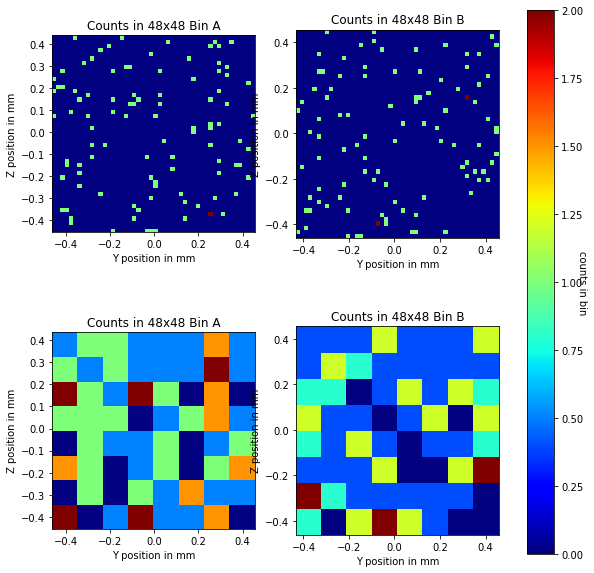

In [8]:
#fig, ax = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
fig, ax = plt.subplots(2,2, figsize=(10, 10))

h = ax[0,0].hist2d(yA, zA, bins=48, cmap='jet')
ax[0,0].set_title('Counts in 48x48 Bin A')
ax[0,0].set_xlabel('Y position in mm')
ax[0,0].set_ylabel('Z position in mm')
ax[0,0].set_aspect('equal')
#plt.colorbar(h[3], ax=ax[0])

h1= ax[0,1].hist2d(yB, zB, bins=48, cmap='jet')
ax[0,1].set_title('Counts in 48x48 Bin B')
ax[0,1].set_xlabel('Y position in mm')
ax[0,1].set_ylabel('Z position in mm')
ax[0,1].set_aspect('equal')
#plt.colorbar(h[3], ax=ax[1])

h2 = ax[1,0].hist2d(yA, zA, bins=8, cmap='jet')
ax[1,0].set_title('Counts in 48x48 Bin A')
ax[1,0].set_xlabel('Y position in mm')
ax[1,0].set_ylabel('Z position in mm')
ax[1,0].set_aspect('equal')
#plt.colorbar(h[3], ax=ax[0])

h3= ax[1,1].hist2d(yB, zB, bins=8, cmap='jet')
ax[1,1].set_title('Counts in 48x48 Bin B')
ax[1,1].set_xlabel('Y position in mm')
ax[1,1].set_ylabel('Z position in mm')
ax[1,1].set_aspect('equal')
#plt.colorbar(h[3], ax=ax[1])
#cbar = fig.add_axes([1, 0.15, 0.05, 0.7])
cbar = plt.colorbar(h[3], ax=ax)
cbar.set_label('counts in bin', rotation=270)

In [ ]:
#Beginning PMT Process
a = np.array([1,2,3,4])
b = 2*a
print (b)
#28,600 photons /0.511 MeV = 55968.69 pho/MeV
scintEff = 55968.69
qe = 0.24
gain = 10**6
es = edep*scintEff*qe*gain
print (edep)
print (es)

In [ ]:
pDGEncoding = hits.arrays()[b'PDGEncoding']
#print (pDGEncoding) 
#all are 22, that means it's a gamma particle

trackID = hits.arrays()[b'trackID']
print (trackID)

parentID = hits.arrays()[b'parentID']
#print (parentID)

trackLocalTime = hits.arrays()[b'trackLocalTime']
#print (trackLocalTime)

time = hits.arrays()[b'time']
#print (time)

edep = hits.arrays()[b'edep']
#print (edep[0])

stepLength = hits.arrays()[b'stepLength']
#print (stepLength)

trackLength = hits.arrays()[b'trackLength']
#print (trackLength)

posX = hits.arrays()[b'posX']
#print (posX)

posY = hits.arrays()[b'posY']
#print (posY)

posX = hits.arrays()[b'posZ']
#print (posZ)

localposX = hits.arrays()[b'localPosX']
#print (localposX)

localposY = hits.arrays()[b'localPosY']
#print (localposY)

localposX = hits.arrays()[b'localPosZ']
#print (localposZ)

blockIDs = hits.arrays()[b'blockID']
#print (blockIDs)

crystalIDs = hits.arrays()[b'crystalID']
#print (crystalIDs)

eventID = hits.arrays()[b'eventID']
#print (eventID)

runID = hits.arrays()[b'runID']
#print (runID)


#probably want all the y and z plotted....that would be face of crystal...of let's try that

# Plot 2: edep, step length and track length

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
edep = hits.arrays()[b'edep']
n, bins, patches = ax[0].hist(edep, 100, facecolor='green', alpha=0.75)
ax[0].set_title('Edep')
ax[0].set_xlabel('Energy in MeV')

# Plot 1
stepLength = hits.arrays()[b'stepLength']
n, bins, patches = ax[1].hist(stepLength, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Step Length')
ax[1].set_xlabel('Length in mm')

# Plot 2
trackLength = hits.arrays()[b'trackLength']
n, bins, patches = ax[2].hist(trackLength, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Track Length')
ax[2].set_xlabel('Length in mm')

In [ ]:
singles = f[b'Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

# Plot 3: energy  of the singles

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot 1
energy = singles.arrays()[b'energy']/0.001
n, bins, patches = ax.hist(energy, 200, facecolor='green', alpha=0.75)
ax.set_title('Edep')
ax.set_xlabel('Energy in keV')

# Plot 4: Coincidencs and LOR

In [ ]:
coinc = f[b'Coincidences']
print('Number of coincidences :', len(coinc))
print('coinc: ')
for i in coinc.keys():
    print(i, ' ', end='')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x1 = coinc.arrays()[b'globalPosX1']
y1 = coinc.arrays()[b'globalPosY1']
x2 = coinc.arrays()[b'globalPosX2']
y2 = coinc.arrays()[b'globalPosY2']

ax.plot([x1,x2],[y1,y2])

ax.autoscale()
ax.set_xlabel('Position in mm')
ax.set_ylabel('Poisition in mm')
ax.set_title('Lines of response (LOR)')